# SC14. Análisis Causal y Predictivo Utilizando Regresión

## L2. Asociación entre dos variables

### Dispersión y correlación

#### Diagrama de dispersión

In [1]:
import pandas as pd

datos = pd.DataFrame({
    "% hogares con detector de humo": [0.5, 0.67, 0.74, 0.76, 0.77, 0.82, 0.81, 0.85, 0.86, 0.88, 0.9, 0.92, 0.95, 0.96, 0.97, 0.96, 0.96],
    "Tasa de mortalidad por incendios": [22.9, 20.8, 17.3, 20.5, 19.4, 18.9, 17.6, 16.2, 13.6, 14.4, 14.3, 13, 10.9, 10.9, 10.2, 8.4, 8.1]
})

datos.head()

,% hogares con detector de humo,Tasa de mortalidad por incendios
0,0.50,22.9
1,0.67,20.8
2,0.74,17.3
3,0.76,20.5
4,0.77,19.4


Para crear un diagrama de dispersión en Python, se puede utilizar la biblioteca `seaborn`, que simplifica ciertas operaciones que son más complejas en `matplotlib`. Utiliza la función `scatterplot`, especificando el DataFrame y los nombres de las columnas para los ejes X e Y. Después, configura el gráfico utilizando el objeto `plt` para personalizarlo según se necesite.

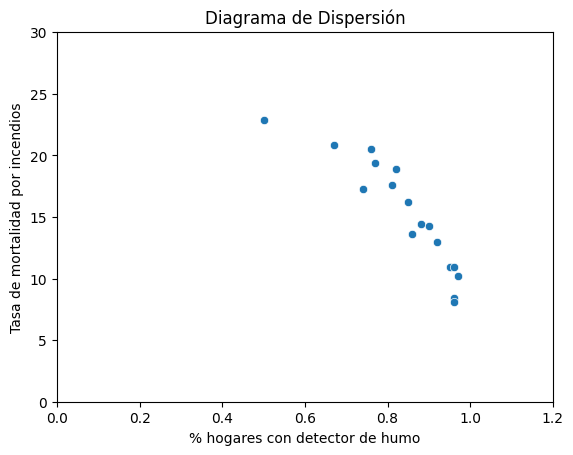

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=datos, x=datos.columns[0], y=datos.columns[1])
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1, 1.2])
plt.yticks([0, 5, 10, 15, 20, 25, 30])
plt.title('Diagrama de Dispersión')
plt.show()

#### Coeficiente de Correlación

Para obtener el coeficiente de correlación puedes utilizar la función corr disponible en el dataframe, la cual calcula la correlación de cada una de las columnas contra las columnas restantes del dataframe. En este caso al tener únicamente dos columnas proporciona un resultado con dos filas por dos columnas, que indica la correlación para cada intersección de columnas.

In [3]:
datos.corr()


,% hogares con detector de humo,Tasa de mortalidad por incendios
% hogares con detector de humo,1.000000,-0.905955
Tasa de mortalidad por incendios,-0.905955,1.000000


#### Caso Ventas

In [4]:
import pandas as pd

ventas = pd.DataFrame({
    "Vendedor": ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"],
    "Potencial": [2, 4, 7, 1, 6, 3, 10, 9, 8, 5],
    "Ventas de 2 años": [400, 360, 300, 295, 280, 350, 200, 260, 220, 385],
    "Ranking de Ventas de 2 años": [1, 3, 5, 6, 7, 4, 10, 8, 9, 2]
})
ventas.head()

,Vendedor,Potencial,Ventas de 2 años,Ranking de Ventas de 2 años
0,A,2,400,1
1,B,4,360,3
2,C,7,300,5
3,D,1,295,6
4,E,6,280,7


In [5]:
ventas[['Potencial', 'Ventas de 2 años',
        'Ranking de Ventas de 2 años']].corr()

,Potencial,Ventas de 2 años,Ranking de Ventas de 2 años
Potencial,1.000000,-0.748512,0.733333
Ventas de 2 años,-0.748512,1.000000,-0.991711
Ranking de Ventas de 2 años,0.733333,-0.991711,1.000000


## L3. Regresión Lineal Simple - Parte 1

### Método de mínimos cuadrados para obtener la ecuación

In [6]:
import pandas as pd

datos = pd.DataFrame({
    "Porcentaje menos de 21 años": [
        13, 12, 8, 12, 11, 17, 18, 8, 13, 8, 9, 9, 16, 12, 9, 10, 9, 11, 12, 14,
        14, 17, 11, 17, 8, 16, 15, 9, 8, 14, 8, 15, 10, 10, 14, 18, 10, 14, 16,
        12, 15, 13
    ],
    "Acc. Fatales c/1000": [
        2.962, 0.708, 0.885, 1.652, 2.091, 2.627, 3.83, 0.368, 1.142, 0.645,
        0.926, 1.028, 2.801, 1.405, 1.433, 0.039, 0.338, 1.849, 2.246, 2.855,
        2.352, 3.256, 1.294, 4.1, 2.19, 3.623, 2.623, 0.835, 0.82, 2.89, 1.267,
        3.224, 1.014, 0.493, 1.443, 3.614, 1.926, 1.643, 2.943, 1.913, 2.814,
        2.634
    ]
})

#### Gráfico de dispersión

Text(0.5, 1.0, 'Diagrama de Dispersión')

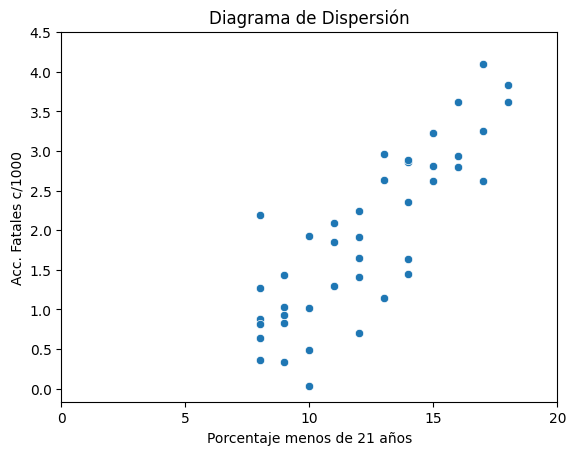

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=datos, x=datos.columns[0], y=datos.columns[1])
plt.xticks([0,5,10,15,20])
plt.yticks([0,0.5,1,1.5,2,2.5,3,3.5,4.,4.5])
plt.title('Diagrama de Dispersión')

#### Ecuación de la recta

La fórmula general para un modelo de regresión lineal es:

$$
y = \beta_0 + \beta_1x_1 + \cdots + \beta_kx_k + \epsilon
$$

donde:
- $\beta_0, \beta_1, \dots, \beta_k$ son los coeficientes.
- $x_1, \dots, x_k$ son las características.
- $\epsilon$ es el término de error.


In [8]:
x = datos[datos.columns[0]]
y = datos[datos.columns[1]]

num = (x * y).sum() - x.size * x.mean() * y.mean()
den = (x ** 2).sum() - x.size * x.mean() ** 2
b1 = num/den
b2 = y.mean() - b1 * x.mean()

print(f'Ecuación de la recta de regresión: y= {round(b2,4)} + {round(b1,4)}x')

Ecuación de la recta de regresión: y= -1.5974 + 0.2871x


#### Modelo lineal

In [9]:
from sklearn import linear_model

clf = linear_model.LinearRegression()
x = [[i] for i in datos[datos.columns[0]]]
y = datos[datos.columns[1]]
clf.fit(x,y)
clf.predict(x)

print(f'Ecuación de la recta de regresión: y= {round(clf.intercept_,4)} + {round(clf.coef_[0],4)}x')

Ecuación de la recta de regresión: y= -1.5974 + 0.2871x


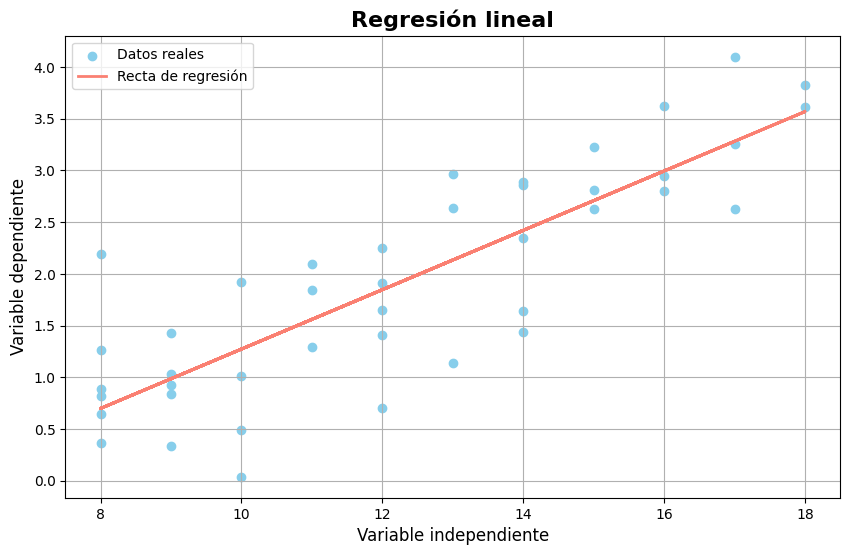

In [10]:
y_pred = clf.predict(x)

plt.figure(figsize=(10,6))
plt.scatter(x,y,color='skyblue', label='Datos reales')
plt.plot(x,y_pred, color='salmon', linewidth=2, label='Recta de regresión')
plt.xlabel('Variable independiente', fontsize=12)
plt.ylabel('Variable dependiente', fontsize=12)
plt.title('Regresión lineal', fontsize=16, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

### Medidas de calidad de ajuste

In [11]:
import numpy as np

x = np.array(datos[datos.columns[0]])
y = np.array(datos[datos.columns[1]])

#### Suma de cuadrados debida al error (SCE):

- Suma de los cuadrados de las diferencias entre los valores observados y los valores predichos por el modelo.
- Un SCE menor indica que el modelo se ajusta mejor a los datos, ya que las predicciones están más cerca de los valores reales.

In [12]:
SCE = ((y - (b2 + b1 * x)) ** 2).sum()
print("SCE:", SCE)

SCE: 13.893350482207353


#### Suma total de cuadrados (STC):

- Suma de los cuadrados de las diferencias entre cada valor observado y la media de todos los valores observados.
- Mide la variabilidad total en los datos; cuanto más alta, mayor es la dispersión respecto a la media.

In [13]:
STC = ((y - y.mean()) ** 2).sum()
print("STC:",STC)

STC: 47.02776811904762


#### Suma de cuadrados debida a la regreseión (SCR):

- Suma de los cuadrados de las diferencias entre los valores predichos por el modelo y la media de los valores observados.
- Cuanto mayor sea la SCR, mejor será el modelo en explicar la variabilidad de los datos.

In [14]:
SCR = STC - SCE
print("SCR:",SCR)

SCR: 33.13441763684027


#### Coeficiente de determinación - ***manual***

- También conocido como  R^2 , es la proporción de la variación en la variable dependiente que es predecible a partir de las variables independientes.
- Un  R^2  cercano a 1 indica un excelente ajuste del modelo, explicando casi toda la variación en los datos.

In [15]:
rc = SCR/STC
print("rc:",rc)

rc: 0.7045713407653692


#### Coeficienrte de determinación - ***scikit-learn***

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np

clf = LinearRegression()
xl = np.array(x)
clf.fit(xl.reshape(-1, 1), y)
predictions = clf.predict(xl.reshape(-1, 1))

r2 = clf.score(xl.reshape(-1, 1), y)

print(f"Coeficiente de Determinación R2: {r2}")

Coeficiente de Determinación R2: 0.7045713407653692


#### Coeficiente de correlación mustral

- Mide la fuerza y dirección de la relación lineal entre dos variables cuantitativas.
- Un valor cercano a +1 o -1 indica una fuerte correlación lineal positiva o negativa, respectivamente, mientras que un valor cercano a 0 indica una ausencia de correlación lineal.

In [17]:
import math 

sig = 1 if b1 >= 0 else -1
rxy = sig * math.sqrt(rc)
print("rxy:", rxy)

rxy: 0.8393874795142999


## L4. Regresion Lieneal Simple - Parte 2

### Pruebas de significancia

In [18]:
import pandas as pd

datos = pd.DataFrame({
    "Porcentaje menos de 21 años": [
        13, 12, 8, 12, 11, 17, 18, 8, 13, 8, 9, 9, 16, 12, 9, 10, 9, 11, 12, 14,
        14, 17, 11, 17, 8, 16, 15, 9, 8, 14, 8, 15, 10, 10, 14, 18, 10, 14, 16,
        12, 15, 13
    ],
    "Acc. Fatales c/1000": [
        2.962, 0.708, 0.885, 1.652, 2.091, 2.627, 3.83, 0.368, 1.142, 0.645,
        0.926, 1.028, 2.801, 1.405, 1.433, 0.039, 0.338, 1.849, 2.246, 2.855,
        2.352, 3.256, 1.294, 4.1, 2.19, 3.623, 2.623, 0.835, 0.82, 2.89, 1.267,
        3.224, 1.014, 0.493, 1.443, 3.614, 1.926, 1.643, 2.943, 1.913, 2.814,
        2.634
    ]
})

In [19]:
x = datos[datos.columns[0]]
y = datos[datos.columns[1]]

# Cálculo de b1 y b2
num = (x * y).sum() - x.size * x.mean() * y.mean()
den = (x**2).sum() - x.size * (x.mean()**2)
b1 = num / den
b2 = y.mean() - b1 * x.mean()

print(f"Ecuación de la recta de regresión: y= {round(b2, 4)} + {round(b1, 4)}x")

# Medidas de calidad de ajuste
SCE = round(((y - (b2 + b1 * x))**2).sum(), 3)
STC = round(((y - y.mean())**2).sum(), 3)
SCR = STC - SCE
rc = round(SCR / STC, 4)

print(f"SCE: {SCE}, STC: {STC}, SCR: {SCR}, rc: {rc}")

Ecuación de la recta de regresión: y= -1.5974 + 0.2871x
SCE: 13.893, STC: 47.028, SCR: 33.135, rc: 0.7046


#### Cálculo del cuadrado medio

- Es una medida usada en análisis de varianza (ANOVA) obtenida al dividir la suma de cuadrados de cada fuente de variación por sus grados de libertad correspondientes.

- Indica la varianza promedio para cada fuente de variación, permitiendo comparar la variabilidad entre grupos con la variabilidad dentro de los grupos, y se utiliza para calcular estadísticos F en pruebas ANOVA.

In [20]:
ECM = SCE/(x.size-2)
print('ECM:',ECM)

ECM: 0.347325


#### Calculo del error estandar de estimacion

- Es la desviación estándar de los residuos o errores de predicción en modelos de regresión.

- Un valor menor del error estándar indica que el modelo tiene un mejor ajuste y que las predicciones son más precisas, siendo un indicador crucial de la calidad del ajuste del modelo.

In [21]:
import math 

S = round(math.sqrt(ECM),4)
print("Error estandar de estimacion: ",S)

Error estandar de estimacion:  0.5893


#### Obtencion del valor-p de estadistico t

- Mide la probabilidad de observar un resultado de prueba al menos tan extremo como el valor del estadístico t calculado, bajo la suposición de que la hipótesis nula es cierta.

- Se utiliza para evaluar la significancia de coeficientes individuales en modelos de regresión o comparaciones entre grupos. Un valor-p bajo (generalmente <0.05) sugiere que es muy improbable que la observación sea debido al azar, y por lo tanto, la hipótesis nula puede ser rechazada.

In [22]:
from scipy.stats import t
import math

val_t = round(b1 / (S / math.sqrt((x**2).sum() - x.size * x.mean()**2)), 2)
print("Valor T: ", val_t)

valor_p = t.sf(val_t, x.size - 2) * 2
print("Valor-p: ", valor_p)


Valor T:  9.77
Valor-p:  3.761785306010648e-12


#### Obtencion del valor-p del estadistico de prueba F

- Similar al valor-p para el estadístico t, pero específicamente relacionado con el estadístico F utilizado en análisis de varianza o regresión para comparar las varianzas entre y dentro de los grupos.

- Un valor-p bajo indica una diferencia significativa entre los grupos, sugiriendo que el modelo o los factores evaluados tienen un efecto estadísticamente significativo en la variable dependiente.

In [23]:
from scipy.stats import f

val_f = round((SCR / 1) / ECM, 1)
print("Valor F = ", val_f)

valor_p = f.sf(val_f, 1, x.size - 2)
print("valor-p: ", valor_p)

Valor F =  95.4
valor-p:  3.791579167042454e-12


#### Tabla ANOVA

- Una tabla utilizada en el análisis de varianza que resume los componentes de variación entre y dentro de los grupos de datos, incluyendo sumas de cuadrados, grados de libertad, cuadrados medios, y el estadístico F.

- Proporciona una visión integral de cómo las variables independientes afectan la variabilidad de la variable dependiente, permitiendo decidir si los modelos o factores tienen un impacto significativo.

In [24]:
import pandas as pd

ANOVA = pd.DataFrame({
    "Fuente de Variación": pd.Series(["Regresión", "Error", "Total"], index=[0, 1, 2]),
    "Suma de Cuadrados": pd.Series([SCR, SCE, STC], index=[0, 1, 2]),
    "Grados de Libertad": pd.Series([1, x.size - 2, x.size - 1], index=[0, 1, 2]),
    "Cuadrado Medio": pd.Series([SCR / 1, ECM], index=[0, 1]),
    "F": pd.Series([val_f], index=[0]),
    "Valor-p": pd.Series([valor_p], index=[0])
})

ANOVA

,Fuente de Variación,Suma de Cuadrados,Grados de Libertad,Cuadrado Medio,F,Valor-p
0,Regresión,33.135,1,33.135000,95.4,3.791579e-12
1,Error,13.893,40,0.347325,NaN,NaN
2,Total,47.028,41,NaN,NaN,NaN


### Validación de los supuestos del modelo

#### Estimación puntual

- Una estimación puntual es un valor único calculado a partir de los datos de muestra que se usa como la mejor estimación de un parámetro poblacional desconocido.

- Representa el valor más plausible para el parámetro según la muestra de datos actual. Sin embargo, no proporciona información sobre la precisión o la incertidumbre asociada a la estimación.

In [25]:
xp = 10
est_punt = round(b2 + b1 * xp,4)
print("Estimacion Puntual: ", est_punt)

Estimacion Puntual:  1.2731


#### Intérvalo de confianza

- Un intervalo de confianza es un rango calculado a partir de los datos de muestra que se espera que contenga el valor del parámetro poblacional con un cierto nivel de confianza, típicamente expresado como un porcentaje (por ejemplo, 95%).

- Ofrece un rango dentro del cual se puede esperar que se encuentre el verdadero valor del parámetro poblacional, con una probabilidad especificada (por ejemplo, 95%). Refleja la incertidumbre alrededor de la estimación puntual y ayuda a entender la variabilidad en las estimaciones derivadas de diferentes muestras.


In [28]:
import math
from scipy.stats import t

# valor de la estimación
estimacion = 10  

# Calculando el término necesario
sum_xi2_nxm2 = (x**2).sum() - x.size * x.mean()**2

# Calculando el valor t
ta2 = round(t.isf(0.025, x.size - 2), 3)

# Calculando el valor más-menos
val_mas_menos = round(ta2 * S * math.sqrt(1/x.size + (xp - x.mean())**2 / sum_xi2_nxm2), 4)

print(estimacion, '-', val_mas_menos)
print(estimacion, '+', val_mas_menos)
print("Intervalo: ", round(estimacion - val_mas_menos, 3), ' a ', round(estimacion + val_mas_menos, 4))


10 - 0.2276
10 + 0.2276
Intervalo:  9.772  a  10.2276


#### Intervalo de prediccion

- Un intervalo de predicción es un rango calculado a partir de los datos de muestra y el modelo estadístico que se espera que contenga el valor futuro de una observación individual con un cierto nivel de confianza.

- Provee un rango dentro del cual se espera que caigan los valores futuros observados, dado un nivel de confianza. Es útil para predecir resultados individuales y generalmente es más amplio que un intervalo de confianza, ya que tiene en cuenta tanto la incertidumbre en la estimación del parámetro como la variabilidad inherente en los datos individuales.

In [31]:
import math

val_int = round(ta2 * S * math.sqrt(1 + 1/x.size + (xp - x.mean())**2 / sum_xi2_nxm2), 4)
print(str(estimacion) + ' - ' + str(val_int))
print(str(estimacion) + ' + ' + str(val_int))
print("Intervalo: ", round(estimacion - val_int, 3), ' a ', round(estimacion + val_int, 4))

10 - 1.2125
10 + 1.2125
Intervalo:  8.788  a  11.2125


#### Grafico residual

- Un gráfico residual es una representación visual de los residuos (errores de predicción), que son las diferencias entre los valores observados y los valores predichos por un modelo estadístico.

- Sirve para evaluar la adecuación del modelo. Residuos que se distribuyen aleatoriamente alrededor de la línea cero sugieren que el modelo se ajusta bien a los datos. Patrones sistemáticos o tendencias en los residuos pueden indicar problemas con el modelo, como la no linealidad, la heterocedasticidad, o la presencia de valores atípicos.

Text(0.5, 1.0, 'Grafico de los resiaduales: % de Licencias')

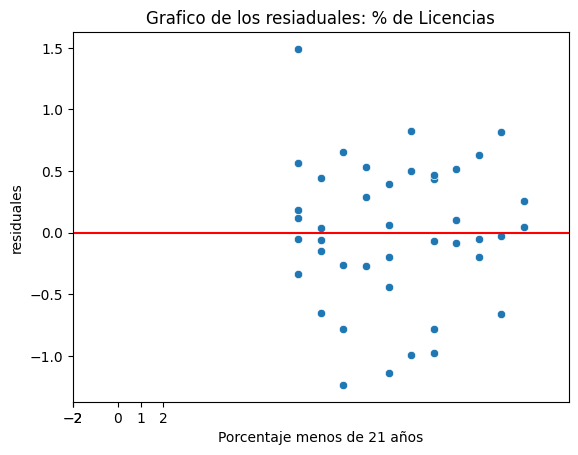

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

residuales = y-(b2+b1*x)
datos['residuales'] = y-(b2+b1*x)
g = sns.scatterplot(data=datos,x=datos.columns[0],y='residuales')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20])
plt.xticks([-2,-2,0,1,2])
plt.axhline(0,color='red')
plt.title('Grafico de los resiaduales: % de Licencias')

#### Muestra de percentiles

Gráfico Q-Q (Quantile-Quantile)

- Es una herramienta visual para evaluar si un conjunto de datos sigue una distribución teórica específica, como la normal. Compara los cuantiles de los datos con los cuantiles de una distribución teórica.

- Alineación: Si los puntos siguen una línea recta, indica que los datos podrían provenir de la distribución teórica.
- Desviaciones: Desviaciones de la línea sugieren diferencias en las colas o sesgos en los datos en comparación con la distribución teórica.

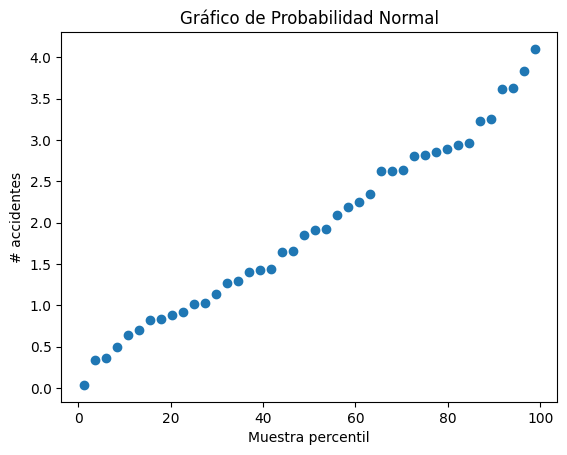

In [33]:
inc = 100 / x.size
y_ord = y.sort_values()
muestra_percentiles = np.arange(inc / 2, 101, inc)
plt.scatter(muestra_percentiles, y_ord)
plt.xlabel('Muestra percentil')
plt.ylabel('# accidentes')
plt.title('Gráfico de Probabilidad Normal');

## L5. Regresion Lineal Múltiple - Parte 1

### Exploración gráfica de variables

In [45]:
import pandas as pd

data = {
    "Precio de Venta": [3000, 2700, 2995, 5500, 3988, 3900, 2800, 6800, 6295, 3700, 
                        7450, 6800, 6795, 6476, 6450, 4800, 9695, 9675, 9595, 8500, 
                        7995, 6995, 6450, 14350, 11965, 11850, 11000, 7600, 19888, 16000, 17650],
    "Antigüedad (en años)": [9, 9, 8, 7, 7, 7, 7, 6, 6, 6, 
                             5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 
                             4, 4, 3, 3, 3, 3, 3, 2, 2, 1, 1],
    "Millaje (en miles)": [70, 99, 120, 56, 50, 83, 106, 70, 66, 60, 
                           55, 67, 62, 60, 55, 75, 44, 37, 44, 55, 
                           46, 56, 65, 29, 23, 27, 31, 45, 18, 19, 9],
    "Condición": ["Promedio", "Mala", "Mala", "Promedio", "Mala", "Mala", "Mala", "Excelente", "Promedio", "Mala", 
                  "Promedio", "Mala", "Promedio", "Promedio", "Mala", "Mala", "Promedio", "Excelente", "Promedio", "Promedio", 
                  "Mala", "Mala", "Mala", "Excelente", "Mala", "Excelente", "Promedio", "Promedio", "Excelente", "Excelente", "Excelente"],
    "Vendedor": ["Propietario", "Propietario", "Propietario", "Intermediario", "Propietario", "Propietario", "Propietario", "Intermediario", "Intermediario", "Propietario", 
                 "Intermediario", "Propietario", "Propietario", "Propietario", "Propietario", "Propietario", "Intermediario", "Intermediario", "Propietario", "Propietario", 
                 "Propietario", "Propietario", "Intermediario", "Intermediario", "Intermediario", "Intermediario", "Intermediario", "Propietario", "Intermediario", "Intermediario", "Intermediario"]
}

autos = pd.DataFrame(data)
autos.head()

,Precio de Venta,Antigüedad (en años),Millaje (en miles),Condición,Vendedor
0,3000,9,70,Promedio,Propietario
1,2700,9,99,Mala,Propietario
2,2995,8,120,Mala,Propietario
3,5500,7,56,Promedio,Intermediario
4,3988,7,50,Mala,Propietario


#### Diagramas de dispersión para variables cuantitativas

##### Precio de venta con antigüedad

Text(0.5, 0.98, 'Relación Precio Ventas con Antigüedad')

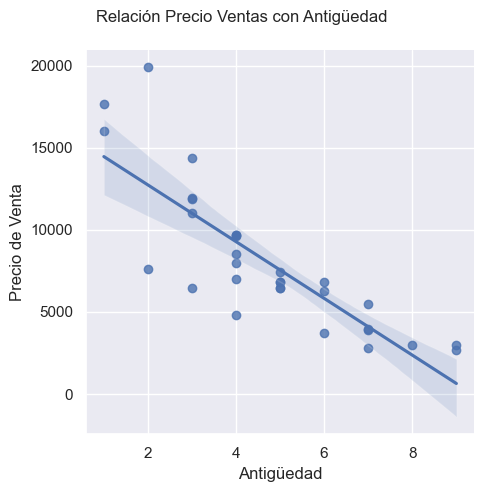

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
g = sns.lmplot(data=autos, x='Antigüedad (en años)', y='Precio de Venta', height=5)
g.set_axis_labels('Antigüedad', 'Precio de Venta')
g.figure.subplots_adjust(top=0.9)
g.figure.suptitle('Relación Precio Ventas con Antigüedad', fontsize=12)

##### Precio de venta con millaje

Text(0.5, 0.98, 'Relación Precio Ventas con Millaje')

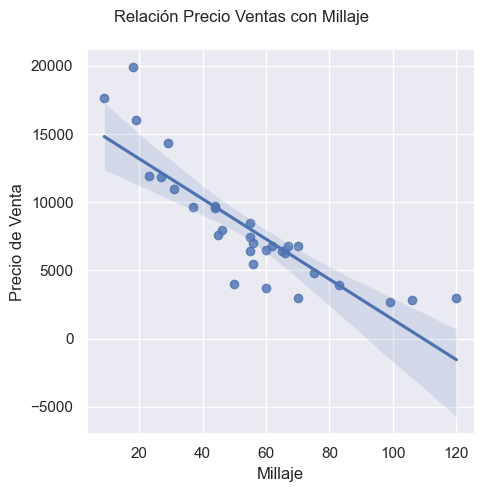

In [47]:
sns.set_theme()
g = sns.lmplot(data=autos, x='Millaje (en miles)', y='Precio de Venta', height=5)
g.set_axis_labels('Millaje', 'Precio de Venta')
g.figure.subplots_adjust(top=0.9)
g.figure.suptitle('Relación Precio Ventas con Millaje', fontsize=12)

#### Diagramas de dispersión para variables cualitativas o categóricas.

##### Condición

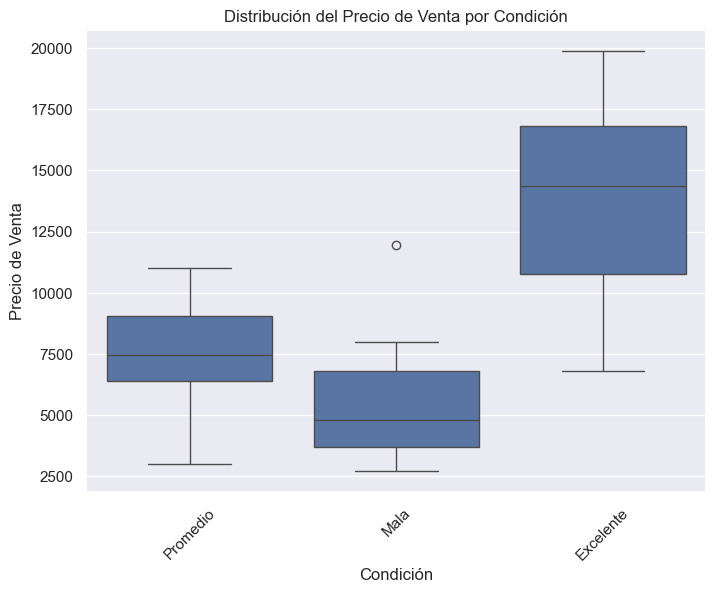

In [52]:
sns.set_theme()

plt.figure(figsize=(8, 6))
sns.boxplot(data=autos, x='Condición', y='Precio de Venta')
plt.xlabel('Condición')
plt.ylabel('Precio de Venta')
plt.title('Distribución del Precio de Venta por Condición')
plt.xticks(rotation=45)
plt.show()

##### Propietario

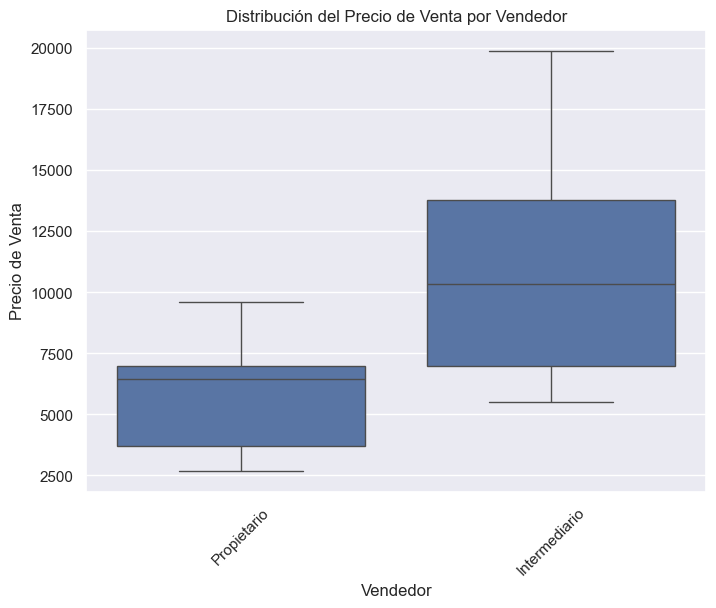

In [54]:
sns.set_theme()

plt.figure(figsize=(8, 6))
sns.boxplot(data=autos, x='Vendedor', y='Precio de Venta')
plt.xlabel('Vendedor')
plt.ylabel('Precio de Venta')
plt.title('Distribución del Precio de Venta por Vendedor')
plt.xticks(rotation=45)
plt.show()

### Método de mínimos cuadrados para obtener la ecuación de regresión múltiple

#### Matríz de correlación

In [58]:
filtrados = autos[['Precio de Venta', 'Antigüedad (en años)', 'Millaje (en miles)']]
correlacion = filtrados.corr()
correlacion

,Precio de Venta,Antigüedad (en años),Millaje (en miles)
Precio de Venta,1.000000,-0.834559,-0.857460
Antigüedad (en años),-0.834559,1.000000,0.808605
Millaje (en miles),-0.857460,0.808605,1.000000


#### Búsqueda del modelo más congruente

In [64]:
import statsmodels.api as sm
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def graficar(X, Y, stan_res, model_loc):
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))

    # Normal Probability Plot
    (quantiles, values), (slope, intercept, r) = stats.probplot(stan_res, dist='norm')
    axes[0, 0].plot(values, quantiles, 'ob')
    axes[0, 0].plot(quantiles * slope + intercept, quantiles, 'r')
    axes[0, 0].set_title('Normal Probability Plot')
    axes[0, 0].set_ylabel('Quantiles')
    axes[0, 0].set_xlabel('Standardized Residual')
    ticks_perc = [1, 10, 50, 90, 99]
    ticks_quan = [stats.norm.ppf(i / 100.) for i in ticks_perc]
    axes[0, 0].set_yticks(ticks_quan)
    axes[0, 0].set_yticklabels(ticks_perc)
    axes[0, 0].grid()

    # Versus Fits
    model_fitted_y = model_loc.fittedvalues
    sns.residplot(x=model_fitted_y, y=Y, lowess=False, ax=axes[0, 1], line_kws={'color': 'red'})
    axes[0, 1].set_title('Versus Fits')
    axes[0, 1].set_xlabel('Fitted Values')
    axes[0, 1].set_ylabel('Residuals')

    # Histogram
    sns.histplot(stan_res, bins=10, ax=axes[1, 0], kde=False)
    axes[1, 0].set_title('Histogram of Standardized Residuals')
    axes[1, 0].set_xlabel('Standardized Residuals')
    axes[1, 0].set_ylabel('Frequency')

    # Versus Order
    axes[1, 1].scatter(X.index, stan_res)
    axes[1, 1].axhline(y=0, color='grey', linestyle=':')
    axes[1, 1].set_title('Residuals Versus Order')
    axes[1, 1].set_xlabel('Observation Order')
    axes[1, 1].set_ylabel('Standardized Residuals')

    plt.tight_layout()
    plt.show()

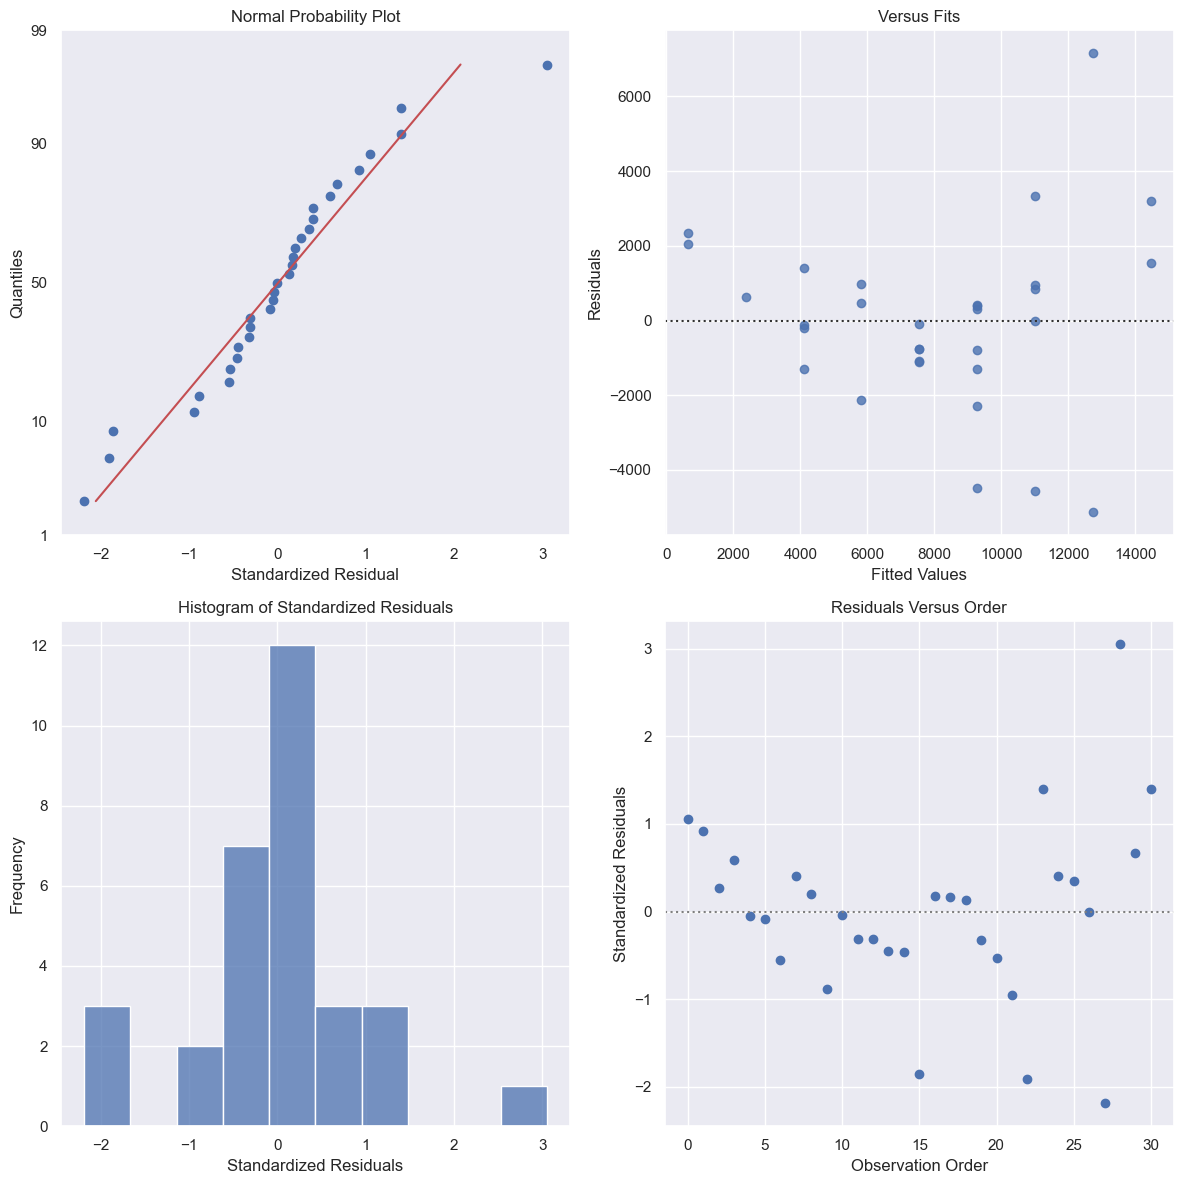

In [65]:
X = autos['Antigüedad (en años)']
Y = autos['Precio de Venta']

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
stan_res = model.get_influence().resid_studentized_internal
graficar(X, Y, stan_res, model)

#### Creación del modelo inicial

In [66]:
X = autos[['Antigüedad (en años)', 'Millaje (en miles)']]
y = autos['Precio de Venta']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Precio de Venta   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     53.58
Date:                Tue, 30 Jul 2024   Prob (F-statistic):           2.68e-10
Time:                        13:16:51   Log-Likelihood:                -279.01
No. Observations:                  31   AIC:                             564.0
Df Residuals:                      28   BIC:                             568.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.701e+04 

## L6. Regresión Lineal Múltiple - Parte 2

### Medidas de calidad de ajuste

#### Prueba de significancia global

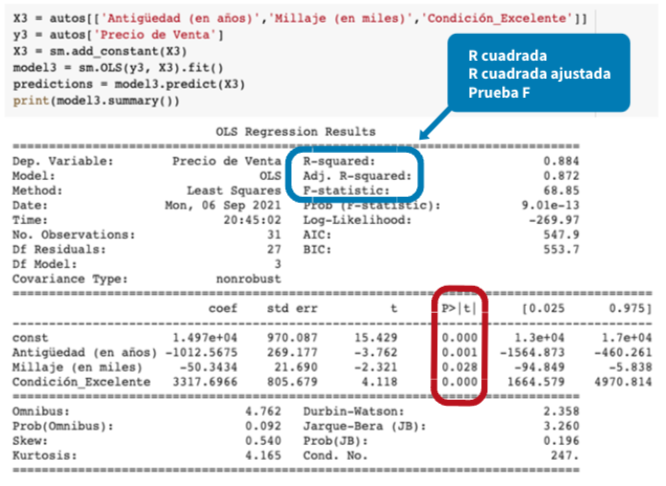

### Validación de supuestos y predicciones.

##### Identificar los valores atípicos

In [67]:
standarized_residuals = model.get_influence().resid_studentized_internal
np.where(abs(standarized_residuals)>2)

(array([ 2, 28]),)

#### Eliminar el registro tanto en los datos en x como en los datos en y

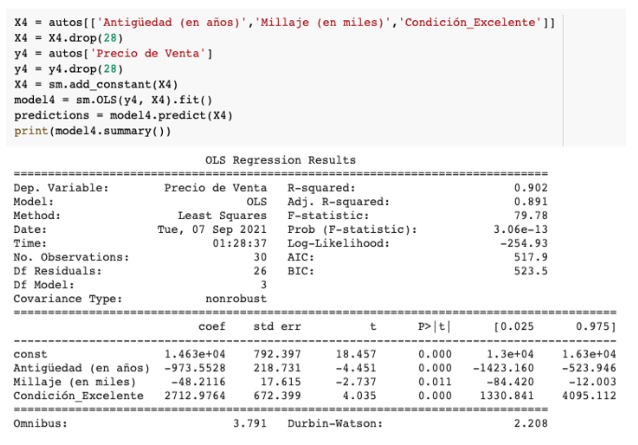

#### Graficar los resultados

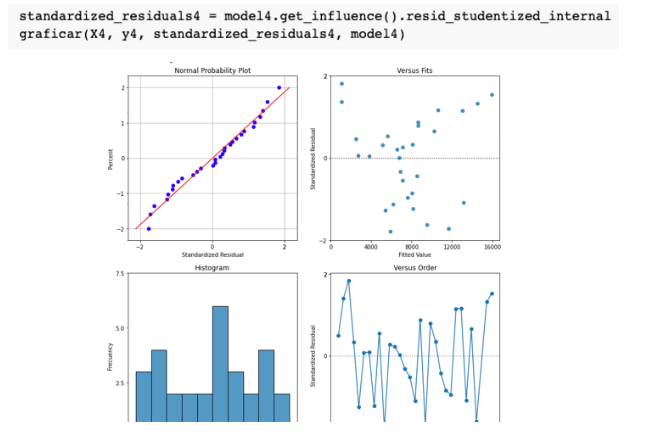

#### Almacenar los coeficientes

In [68]:
model.params

const                   17009.645402
Antigüedad (en años)     -844.275136
Millaje (en miles)        -90.703782
dtype: float64

Ecuación

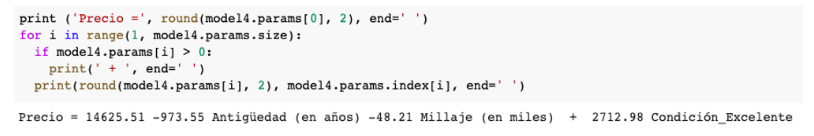

# Reto: Caso Aereolineas

## Introducción 

El transporte aéreo o transporte por avión es el servicio de trasladar de un lugar a otro, pasajeros o cargamento mediante la utilización de aeronaves con fines lucrativos.

Los adelantos de la navegación aérea y las telecomunicaciones, así como las facilidades electrónicas han permitido que la aviación haya progresado de forma asombrosa. Uno de los datos relevantes dentro del servicio de las líneas aéreas, es el tiempo, esto es el llegar a tiempo al destino ofertado. De igual manera existen otros factores clave, y uno de ellos, que es clave, es el precio del boleto al destino deseado.

### Objetivo

El negocio desea brindar un mejor servicio a los clientes de las líneas aéreas, para conseguirlo, es necesario determinar y analizar las variables relevantes en el servicio. En especial los factores clave que determinan el precio del boleto.

### Instrucciones

1. Usa las dos bases de datos para definir y analizar las variables y poner realizar lo siguiente. 
2. Análisis descriptivo de las variables que describen el comportamiento del Servicio en las aerolíneas: 
3. Análisis de multicolinealidad.
4. Construir la ecuación o modelo matemático (copia y pega de la información proporcionada) Indica si el modelo es congruente, es decir, no presenta efectos de multicolinealidad.
5. Validación estadística del modelo:
    - Medidas de calidad del ajuste.
    - Prueba de hipótesis para la ecuación (F).
    - Prueba de hipótesis para cada una de las variables independientes (t).
6. Validación de supuestos:
    - Normalidad en los residuales.
    - Errores con varianza constante.
    - Independencia de los errores.
7. Predicción del precio de venta.

In [2]:
import pandas as pd

In [8]:
df_reg = ('/Users/jvmx/Documents/TLG/Datos/SC14_AerolineasDatos.csv')
df_org = ('/Users/jvmx/Documents/TLG/Datos/SC14_DatosOriginales.xlsx')

               AA       Delta      United  DaysPurchase    Business  \
count  108.000000  108.000000  108.000000    108.000000  108.000000   
mean     0.305556    0.175926    0.250000     45.129630    0.231481   
std      0.462790    0.382532    0.435031     26.917351    0.423746   
min      0.000000    0.000000    0.000000      8.000000    0.000000   
25%      0.000000    0.000000    0.000000     23.000000    0.000000   
50%      0.000000    0.000000    0.000000     40.000000    0.000000   
75%      1.000000    0.000000    0.250000     56.250000    0.000000   
max      1.000000    1.000000    1.000000    123.000000    1.000000   

       First Class      Origin  Ticket Price       Lunes      Martes  \
count   108.000000  108.000000    108.000000  108.000000  108.000000   
mean      0.500000    0.407407    376.370370    0.101852    0.148148   
std       0.502331    0.493643     86.460038    0.303863    0.356903   
min       0.000000    0.000000    300.000000    0.000000    0.000000   


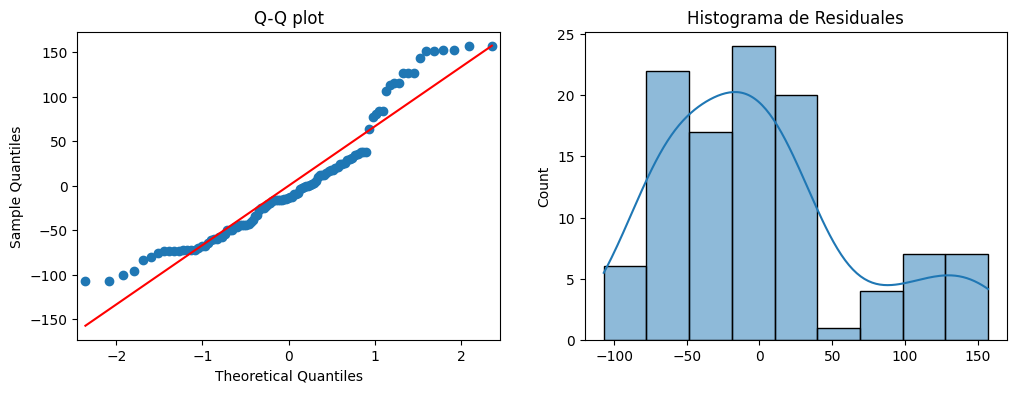

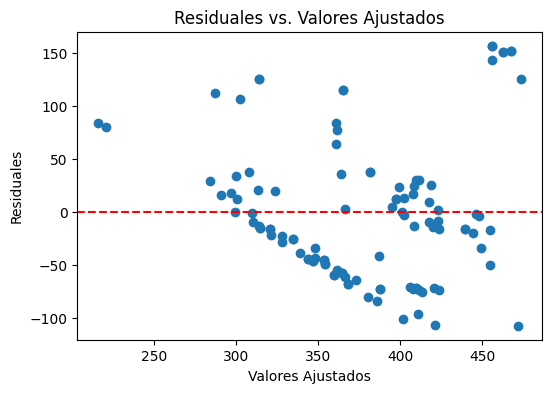

P-value del test de Breusch-Pagan: 0.007949521713478883
        feature       VIF
0         const  8.330563
1            AA  1.301499
2        United  1.296469
3  DaysPurchase  1.038183
4   First Class  1.161270
5      Frequent  1.061859


In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

# Carga de datos
def load_data(filepath):
    return pd.read_csv(filepath)

# Análisis descriptivo
def descriptive_analysis(data):
    print(data.describe())
    print(data.info())

# Construcción del modelo de regresión
def build_regression_model(data, dependent_var, independent_vars):
    X = data[independent_vars]
    X = sm.add_constant(X)  # añade una constante al modelo
    y = data[dependent_var]
    model = sm.OLS(y, X).fit()
    return model

# Imprimir resultados del modelo
def print_model_summary(model):
    print(model.summary())

# Validación de supuestos: Normalidad de residuales y Homocedasticidad
def validate_assumptions(model, X):
    residuals = model.resid
    fitted_vals = model.predict()
    
    # Normalidad de los residuales
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    sm.qqplot(residuals, line='s', ax=ax[0])
    ax[0].set_title('Q-Q plot')
    sns.histplot(residuals, kde=True, ax=ax[1])
    ax[1].set_title('Histograma de Residuales')
    plt.show()
    
    # Homocedasticidad
    plt.figure(figsize=(6, 4))
    plt.scatter(fitted_vals, residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.title('Residuales vs. Valores Ajustados')
    plt.xlabel('Valores Ajustados')
    plt.ylabel('Residuales')
    plt.show()
    
    # Test de Breusch-Pagan para Homocedasticidad
    _, pval, _, _ = sm.stats.het_breuschpagan(residuals, X)
    print('P-value del test de Breusch-Pagan:', pval)

# Cálculo de VIF para evaluar multicolinealidad
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Ejecución del script
if __name__ == "__main__":
    filepath = df_reg
    data = load_data(filepath)
    descriptive_analysis(data)
    
    dependent_var = 'Ticket Price'
    independent_vars = ['AA', 'United', 'DaysPurchase', 'First Class', 'Frequent']
    
    model = build_regression_model(data, dependent_var, independent_vars)
    print_model_summary(model)
    
    X = data[independent_vars]
    X = sm.add_constant(X)
    validate_assumptions(model, X)
    vif = calculate_vif(X)
    print(vif)

In [12]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Carga de datos
def load_data(filepath):
    return pd.read_csv(filepath)

# Construcción del modelo de regresión
def build_regression_model(data, dependent_var, independent_vars):
    X = data[independent_vars]
    X = sm.add_constant(X)  # añade una constante al modelo
    y = data[dependent_var]
    model = sm.OLS(y, X).fit()
    return model, X

# Imprimir resultados del modelo
def print_model_summary(model):
    print(model.summary())

# Cálculo de VIF para evaluar multicolinealidad
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print("\nVIF de cada variable:")
    print(vif_data)

# Optimizar el modelo eliminando variables con alto VIF o bajo p-value
def optimize_model(data, model, X, max_vif=5.0, max_pvalue=0.05):
    params = model.pvalues
    high_pvalues = params[params > max_pvalue].index
    print("\nVariables con p-value alto:", high_pvalues)
    
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    high_vif = vif_data[vif_data["VIF"] > max_vif]["feature"]
    print("\nVariables con VIF alto:", high_vif)
    
    drop_vars = list(set(high_pvalues) | set(high_vif))
    print("\nVariables a eliminar:", drop_vars)
    
    # Eliminar variables con alto VIF o p-value y reconstruir el modelo
    refined_vars = [var for var in X.columns if var not in drop_vars]
    refined_model, refined_X = build_regression_model(data, dependent_var, refined_vars[1:])  # exclude 'const'
    return refined_model, refined_X

# Ejecución del script
if __name__ == "__main__":
    filepath = df_reg
    data = load_data(filepath)
    
    # Variables iniciales del Modelo 1
    dependent_var = 'Ticket Price'
    independent_vars = ['AA', 'Delta', 'United', 'DaysPurchase', 'Business', 'First Class', 'Frequent', 'Extreme']
    
    # Construir y evaluar Modelo 1
    model1, X1 = build_regression_model(data, dependent_var, independent_vars)
    print_model_summary(model1)
    calculate_vif(X1)
    
    # Optimizar al Modelo 2
    model2, X2 = optimize_model(data, model1, X1)
    print_model_summary(model2)
    calculate_vif(X2)

                            OLS Regression Results                            
Dep. Variable:           Ticket Price   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     19.54
Date:                Sat, 03 Aug 2024   Prob (F-statistic):           2.34e-17
Time:                        18:11:28   Log-Likelihood:                -583.23
No. Observations:                 108   AIC:                             1184.
Df Residuals:                      99   BIC:                             1209.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          251.3345     22.215     11.314   